<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1301_voxel_to_stl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -O https://raw.githubusercontent.com/lmcanavals/3D-ORGAN/master/datasets/arq_dataset.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2747k  100 2747k    0     0  5244k      0 --:--:-- --:--:-- --:--:-- 5234k


In [2]:
!tar xvzpf arq_dataset.tar.gz

custom_arq_dataset.npy


In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
data = np.load('custom_arq_dataset.npy', allow_pickle=True).item()

In [45]:
x_train = data['train']['data']
labels, y_train = np.unique(data['train']['labels'], return_inverse=True)
x_test = data['test']['data']
_, y_test = np.unique(data['test']['labels'], return_inverse=True)

In [46]:
print(labels)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

['arq' 'bathtub' 'bed' 'chair' 'desk' 'dresser' 'monitor' 'night_stand'
 'sofa' 'table' 'toilet']
(4923, 32, 32, 32) (4923,)
(1127, 32, 32, 32) (1127,)


In [67]:
def make_hole(voxel, x, y, z, r=1):
    m, n, o = voxel.shape
    voxel[x, y, z] = False
    for i in range(x - r, x + r + 1):
        for j in range(y - r, y + r + 1):
            for k in range(z - r, z + r + 1):
                if i >= 0 and i < m and j >= 0 and j < n and k >= 0 and k < o:
                    voxel[i, j, k] = False

In [56]:
idx = 1000

In [71]:
voxel = x_train[idx].copy()
#print(voxel)

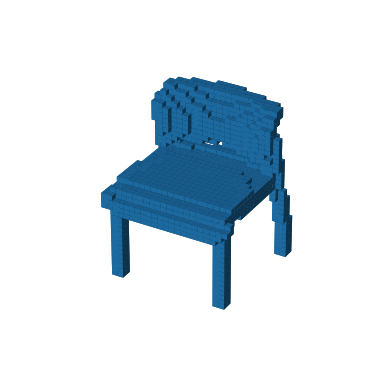

In [66]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel)
plt.axis("off")
plt.show()

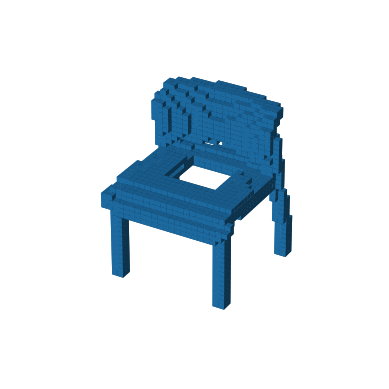

In [72]:
make_hole(voxel, 16, 16, 16, 4)
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxel)
plt.axis("off")
plt.show()

In [ ]:
!pip install -U voxelfuse

In [76]:
!pip install -U quad_mesh_simplify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ante el error en:

    from quad_mesh_simplify import simplify_mesh

reemplazar por:

    from simplify import simplify_mesh

En el propio archivo mismo en:

    /usr/local/lib/python3.10/dist-packages/voxelfuse/mesh.py

In [92]:
from voxelfuse.voxel_model import VoxelModel
from voxelfuse.mesh import Mesh
from voxelfuse.primitives import generateMaterials

In [93]:
model = VoxelModel(voxel, generateMaterials(4))  #4 is aluminium.
mesh = Mesh.fromVoxelModel(model)
mesh.export('mesh.stl')

Meshing: 100%|██████████| 1534/1534 [00:07<00:00, 195.72it/s]
